## Cargar la información del dataset

In [1]:
import pandas as pd
df = pd.read_csv('heart_2020.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Gráficas de los datos

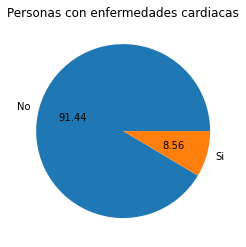

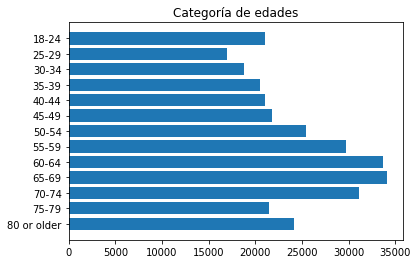

In [2]:
import matplotlib.pyplot as plt

x = [df['HeartDisease'][df['HeartDisease'] == 'No'].count(),
      df['HeartDisease'][df['HeartDisease'] == 'Yes'].count()]

categorias = df['AgeCategory'].unique()
cantidades = [df['AgeCategory'][df['AgeCategory'] == i].count() for i in categorias]

for i in range(len(categorias)):
      for j in range(len(categorias)-1-i):
            if categorias[j] < categorias[j+1]:
                  temp = categorias[j]
                  categorias[j] = categorias[j+1]
                  categorias[j+1] = temp
                  temp = cantidades[j]
                  cantidades[j] = cantidades[j+1]
                  cantidades[j+1] = temp

plt.title('Personas con enfermedades cardiacas')
plt.pie(x,labels=['No','Si'],autopct='%.2f')
plt.show()

plt.title('Categoría de edades')
plt.barh(categorias, cantidades)
plt.show()


## Tratamiento de la información

In [3]:
df_clean = df.copy()

def transformarBinario(x):
    if x == 'No' or x == 'Female':
        return 0
    return 1

def transformarCategoriaEdad(x):
    categorias = ['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older']
    return categorias.index(x)

def transformarRaza(x):
    razas = ['White','Black','Asian','American Indian/Alaskan Native','Other','Hispanic']
    return razas.index(x)

def transformarSalud(x):
    salud = ['Poor','Fair','Good','Very good','Excellent']
    return salud.index(x)

df_clean['HeartDisease'] = df_clean['HeartDisease'].apply(transformarBinario)
df_clean['Smoking'] = df_clean['Smoking'].apply(transformarBinario)
df_clean['AlcoholDrinking'] = df_clean['AlcoholDrinking'].apply(transformarBinario)
df_clean['Stroke'] = df_clean['Stroke'].apply(transformarBinario)
df_clean['DiffWalking'] = df_clean['DiffWalking'].apply(transformarBinario)
df_clean['Sex'] = df_clean['Sex'].apply(transformarBinario)
df_clean['Diabetic'] = df_clean['Diabetic'].apply(transformarBinario)
df_clean['PhysicalActivity'] = df_clean['PhysicalActivity'].apply(transformarBinario)
df_clean['Asthma'] = df_clean['Asthma'].apply(transformarBinario)
df_clean['KidneyDisease'] = df_clean['KidneyDisease'].apply(transformarBinario)
df_clean['SkinCancer'] = df_clean['SkinCancer'].apply(transformarBinario)

df_clean['AgeCategory'] = df_clean['AgeCategory'].apply(transformarCategoriaEdad)
df_clean['Race'] = df['Race'].apply(transformarRaza)
df_clean['GenHealth'] = df_clean['GenHealth'].apply(transformarSalud)

df_clean.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,0,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,0,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,0,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,0,0,1,3,8.0,0,0,0


## División del conjunto de datos

In [4]:
from sklearn.model_selection import train_test_split

salida = df_clean['HeartDisease']
salida = salida.to_numpy()
df_clean = df_clean.drop(['HeartDisease'],axis=1)
entrada = df_clean.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(entrada, salida, test_size=0.15)


## Definición del modelo matemático

In [13]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=300)


## Entrenamiento

In [14]:
from sklearn.metrics import f1_score

modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)
porcentaje = f1_score(y_test, y_pred, average="weighted") * 100
porcentaje


88.94799496679565

## Predicción

In [45]:
probabilidad = modelo.predict_proba([X_test[1]])
print('Probabilidad de tener un enfermedad cardiaca:')
print(f'No: {round(probabilidad[0][0]*100, 2)}%')
print(f'Si: {round(probabilidad[0][1]*100, 2)}%')

Probabilidad de tener un enfermedad cardica:
No: 99.79%
Si: 0.21%


## Guardar el modelo matemático

In [62]:
from joblib import dump

dump(modelo,'modelo.joblib')

['modelo.joblib']